#### Í≤ΩÍ≥ÑÏÑ† Î∂ÑÎ¶¨

otsu threshold: 140.0


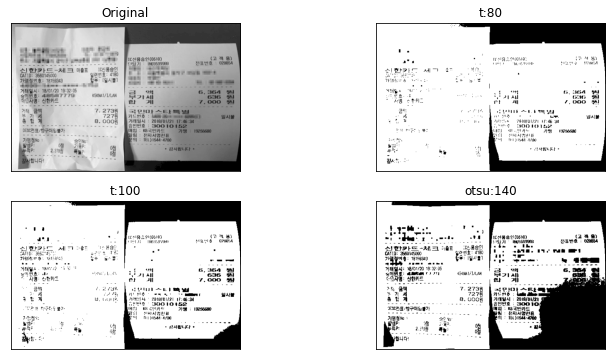

In [6]:
import cv2
import matplotlib.pylab as plt   

plt.rcParams['figure.figsize'] = (12,6)
# Ïù¥ÎØ∏ÏßÄÎ•º Í∑∏Î†àÏù¥ Ïä§ÏºÄÏùºÎ°ú ÏùΩÍ∏∞
img = cv2.imread('OPENCV/receipt.png', cv2.IMREAD_GRAYSCALE)
# Í≤ΩÍ≥Ñ Í∞íÏùÑ 80, 100 ÏúºÎ°ú ÏûÑÏùò ÏßÄÏ†ï
_, t_80	= cv2.threshold(img, 80, 255, cv2.THRESH_BINARY)
_, t_100 = cv2.threshold(img, 100,255, cv2.THRESH_BINARY) 
# Í≤ΩÍ≥Ñ Í∞íÏùÑ ÏßÄÏ†ïÌïòÏßÄ ÏïäÍ≥† OTSU ÏïåÍ≥†Î¶¨Ï¶ò ÏÑ†ÌÉù


#Í≤ΩÍ≥ÑÍ∞í -1(ÏùòÎØ∏ÏóÜÎäî Í∞í)Ïùò Ï†ÑÎã¨ÏùÄ ÏûêÎèôÏúºÎ°ú Í≤ΩÍ≥óÍ∞íÏùÑ ÏÑ†ÌÉù
t, t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  

# Otsu ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú ÏÑ†ÌÉùÎêú Í≤ΩÍ≥Ñ
print('otsu threshold:', t)

imgs = {'Original': img,'t:80':t_80,'t:100':t_100, 'otsu:%d'%t: t_otsu}  
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)  
    plt.title(key)  
    plt.imshow(value, cmap='gray')  
    plt.xticks([]); plt.yticks([])
plt.show()


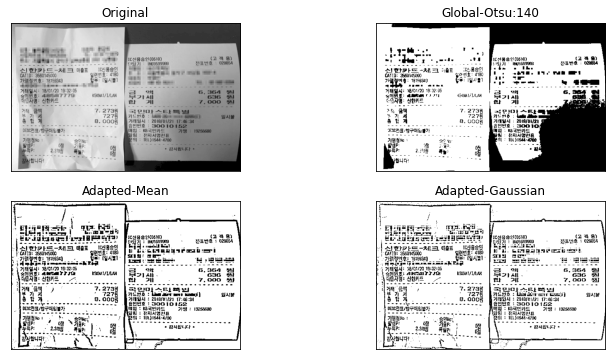

In [5]:
import cv2
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,6)

blk_size = 9  # Î∏îÎü≠ ÏÇ¨Ïù¥Ï¶à
C = 5  # Ï∞®Í∞ê ÏÉÅÏàò

# Í∑∏Î†àÏù¥ Ïä§ÏºÄÏùºÎ°ú ÏùΩÍ∏∞
img = cv2.imread('OPENCV/receipt.png', cv2.IMREAD_GRAYSCALE)

#Ïò§Ï∏†Ïùò ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú Îã®Ïùº Í≤ΩÍ≥Ñ Í∞íÏùÑ Ï†ÑÏ≤¥Ïù¥ÎØ∏ÏßÄÏóê Ï†ÅÏö©
ret, th1 = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#Ï†ÅÏùëÌòï Ïä§Î†àÏãúÌôÄÎìúÎ•º ÌèâÍ∑†Í≥º Í∞ÄÏö∞ÏãúÏïà Î∂ÑÌè¨Î°ú Í∞ÅÍ∞Å Ï†ÅÏö©
th2 = cv2.adaptiveThreshold(
    img,  # ÏûÖÎ†• ÏòÅÏÉÅ
    255,  # Í≤ΩÍ≥óÍ∞íÏùÑ ÎßåÏ°±ÌïòÎäî ÌîΩÏÖÄÏóê Ï†ÅÏö©Ìï† Í∞í
    cv2.ADAPTIVE_THRESH_MEAN_C,  # Ïä§Î†àÏãúÌôÄÎìú Ï†ÅÏö© Î∞©Î≤ï ÏßÄÏ†ï(Ïù¥ÏõÉ ÌîΩÏÖÄÏùò ÌèâÍ∑†ÏúºÎ°ú Í≤∞Ï†ï)
    cv2.THRESH_BINARY,  # Ïù¥ÏßÑ Î∂ÑÎ•ò
    blk_size, C)  # ÏòÅÏó≠ÏúºÎ°ú ÎÇòÎàå Ïù¥ÏõÉÏùò ÌÅ¨Í∏∞, Í≥ÑÏÇ∞Îêú Í≤ΩÍ≥Ñ Í∞í Í≤∞Í≥ºÏóêÏÑú Í∞ÄÍ∞êÌï† ÏÉÅÏàò

th3 = cv2.adaptiveThreshold(
    img,  # ÏûÖÎ†• ÏòÅÏÉÅ
    255,  # Í≤ΩÍ≥óÍ∞íÏùÑ ÎßåÏ°±ÌïòÎäî ÌîΩÏÖÄÏóê Ï†ÅÏö©Ìï† Í∞í
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # Í∞ÄÏö∞ÏãúÏïà Î∂ÑÌè¨Ïóê Îî∞Î•∏ Í∞ÄÏ§ëÏπòÏùò Ìï©ÏúºÎ°ú Í≤∞Ï†ï
    cv2.THRESH_BINARY,  # Ïù¥ÏßÑ Î∂ÑÎ•ò
    blk_size,  #  ÏòÅÏó≠ÏúºÎ°ú ÎÇòÎàå Ïù¥ÏõÉÏùò ÌÅ¨Í∏∞, Í≥ÑÏÇ∞Îêú Í≤ΩÍ≥Ñ Í∞í Í≤∞Í≥ºÏóêÏÑú Í∞ÄÍ∞êÌï† ÏÉÅÏàò
    C)

imgs = {
    'Original': img,
    'Global-Otsu:%d' % ret: th1,
    'Adapted-Mean': th2,
    'Adapted-Gaussian': th3
}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i + 1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([]), plt.yticks([])
plt.show()

#### ÏòÅÏÉÅ Ìï©ÏÑ±

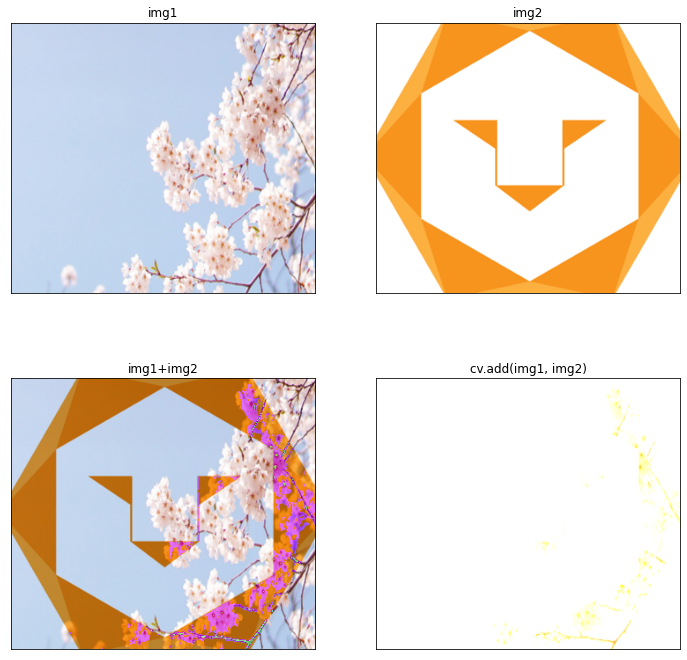

In [10]:
import cv2
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (12,12)

# Ïó∞ÏÇ∞Ïóê ÏÇ¨Ïö©Ìï† Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
img1 = cv2.imread('OPENCV/add_flower.png')
img2 = cv2.imread('OPENCV/add_likelion.png')

# Ïù¥ÎØ∏ÏßÄ ÎçßÏÖà
img3 = img1 + img2  # ÎçîÌïòÍ∏∞ Ïó∞ÏÇ∞
img4 = cv2.add(img1, img2)  # OpenCV Ìï®Ïàò
imgs = {
    'img1': img1,
    'img2': img2,
    'img1+img2': img3,
    'cv.add(img1, img2)': img4
}

# Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i + 1)
    plt.imshow(v[:, :, ::-1])
    plt.title(k)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [11]:
import cv2

alpha = 0.5  # Ìï©ÏÑ±Ïóê ÏÇ¨Ïö©Ìï† ÏïåÌåå Í∞í
# Ìï©ÏÑ±Ïóê ÏÇ¨Ïö©Ìï† Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
img1 = cv2.imread('OPENCV/add_flower.png')
img2 = cv2.imread('OPENCV/add_likelion.png')

# Ìï®ÏàòÎ•º ÌôúÏö©Ìïú Î∞©Î≤ï
dst = cv2.addWeighted(
    img1,  # Ìï©ÏÑ±Ìï† Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄ
    alpha,  # ima1Ïóê ÏßÄÏ†ïÌï† Í∞ÄÏ§ëÏπò(ÏïåÌååÍ∞í)
    img2,  # Ìï©ÏÑ±Ìï† Îëê Î≤àÏ®∞ Ïù¥ÎØ∏ÏßÄ
    (1 - alpha),  # img2Ïóê ÏßÄÏ†ïÌï† Í∞ÄÏ§ëÏπò
    0)  # Ïó∞ÏÇ∞ Í≤∞Í≥ºÏóê Í∞ÄÍ∞êÌï† ÏÉÅÏàò, ÎåÄÏ≤¥Î°ú 0Ï†ÅÏö©
cv2.imshow('cv2.addWeighted', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Ìä∏ÎûôÎ∞î ÎßåÎì§Í∏∞

In [ ]:
def onChange(value):
    v = cv2.getTrackbarPos(
        'trackbar',  # Ï∞æÍ≥†Ïûê ÌïòÎäî Ìä∏ÎûôÎ∞î Ïù¥Î¶Ñ
        'win_name')  # Ìä∏ÎûôÎ∞îÍ∞Ä ÏûàÎäî Ï∞ΩÏùò Ïù¥Î¶Ñ
    cv2.createTrackbar(
        'trackbar',  # Ìä∏ÎûôÎ∞î Ïù¥Î¶Ñ
        'win_name',  # Ìä∏ÎûôÎ∞îÎ•º ÌëúÏãúÌï† Ï∞Ω Ïù¥Î¶Ñ0,	# Ìä∏Îûô Î∞î Ï¥àÍ∏∞ Í∞í
        100,  # Ìä∏Îûô Î∞î ÏµúÎåÄ Í∞í
        onChange)  # Ìä∏ÎûôÎ∞î Ïù¥Î≤§Ìä∏ Ìï∏Îì§Îü¨ Ìï®Ïàò
    

In [12]:
import cv2

win_name = 'Alpha blending'  # Ï∞Ω Ïù¥Î¶Ñ
trackbar_name = 'fade'


# --- Ìä∏Î†âÎ∞î Ïù¥Î≤§Ìä∏ Ìï∏Îì§Îü¨ Ìï®Ïàò
def onChange(x):
    alpha = x / 100
    dst = cv2.addWeighted(img1, 1 - alpha, img2, alpha, 0)
    cv2.imshow(win_name, dst)


# Ìï©ÏÑ± ÏòÅÏÉÅ ÏùΩÍ∏∞
img1 = cv2.imread('OPENCV/add_flower.png')
img2 = cv2.imread('OPENCV/add_likelion.png')
# Ïù¥ÎØ∏ÏßÄ ÌëúÏãú Î∞è Ìä∏Î†âÎ∞î Î∂ôÏù¥Í∏∞
cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)
cv2.waitKey()
cv2.destroyAllWindows()

#### Ï∞® ÏòÅÏÉÅ(ùëñùëöùëéùëîùëí ùëëùëñùëìùëìùëíùëüùëíùëõùëêùëñùëõùëî) -  Îëê ÏòÅÏÉÅÏùò Ï∞®Ïù¥

    Ïù¥Îü¨Ìïú Í∏∞Î≤ïÏùÄ ÏÇ∞ÏóÖÌòÑÏû•  ÏóêÏÑú ÎèÑÎ©¥Ïùò Ï∞®Ïù¥Î•º Ï∞æÍ±∞ÎÇò Ï†ÑÏûêÏ†úÌíàÏùò PCBÌöåÎ°úÏùò Ïò§Î•òÎ•º Ï∞æÎäî Îç∞ÎèÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÍ≥†, 
    Ïπ¥Î©îÎùºÎ°ú Ï¥¨ÏòÅÌïú ÏòÅÏÉÅÏóê Ïã§ÏãúÍ∞ÑÏúºÎ°ú ÏõÄÏßÅÏûÑÏù¥ ÏûàÎäîÏßÄÎ•º ÏïåÏïÑÎÇ¥Îäî Îç∞ÎèÑ Ïú†Ïö©Ìï©ÎãàÎã§. 
    Ï∞® ÏòÅÏÉÅÏùÑ Íµ¨Ìï† Îïå Îëê ÏòÅÏÉÅÏùÑ Î¨¥ÌÑ±ÎåÄÍ≥† ÎπºÍ∏∞ Ïó∞ÏÇ∞ÏùÑ ÌïòÎ©¥ ÏùåÏàòÍ∞Ä ÎÇòÏò¨ Ïàò ÏûàÏúºÎØÄÎ°ú Ï†àÎåÄÍ∞íÏùÑ Íµ¨Ìï¥Ïïº Ìï©ÎãàÎã§.

In [20]:
import cv2
# Ïó∞ÏÇ∞Ïóê ÌïÑÏöîÌïú ÏòÅÏÉÅÏùÑ ÏùΩÍ≥† Í∑∏Î†àÏù¥Ïä§ÏºÄÏùºÎ°ú Î≥ÄÌôò
img1 = cv2.imread('OPENCV/floor_plan_A.jpg')
img2 = cv2.imread('OPENCV/floor_plan_B.jpg')

#Í∑∏Î†àÏù¥ Ïä§ÏºÄÏùºÎ°ú Î≥ÄÌôò
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 1Î≤à. Îëê ÏòÅÏÉÅÏùò Ï†àÎåÄÍ∞í Ï∞® Ïó∞ÏÇ∞
diff = cv2.absdiff(img1_gray, img2_gray)
# Ï∞® ÏòÅÏÉÅÏùÑ Í∑πÎåÄÌôî ÌïòÍ∏∞ ÏúÑÌï¥ Ïä§Î†àÏãúÌôÄÎìú Ï≤òÎ¶¨ Î∞è Ïª¨Îü¨Î°ú Î≥ÄÌôò
# Ï∞®Ïù¥Î•º Í∑πÎåÄÌôî ÌïòÍ∏∞ÏúÑÌï¥ 1Î≥¥Îã§ ÌÅ∞ Í∞íÏùÄ Î™®Îëê 255Î°ú Î∞îÍøà
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)

# 2Î≤à. ÏÉâÏÉÅÏùÑ ÌëúÌòÑÌïòÍ∏∞ ÏúÑÌï¥ Ïª¨Îü¨ Ïä§ÏºÄÏùºÎ°ú Ï†ÑÌôò
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
# Ï∞®Ïù¥Í∞Ä Î∞úÏÉùÌïú Î∂ÄÎ∂ÑÏóê ÎåÄÌïòÏó¨ Î∂âÏùÄ ÏÉâÏúºÎ°ú Ï†ÑÌôò
diff_red[:, :, 2] = 0

# Îëê Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏóê Î≥ÄÌôî Î∂ÄÎ∂Ñ ÌëúÏãú
spot = cv2.bitwise_xor(img2, diff_red)
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÎäî Î∞∞Í≤ΩÏù¥ Ìù∞ÏÉâÏù¥ÎØÄÎ°ú 255Î•º Í∞ÄÏßÄÍ≥† ÏûàÍ≥† Ï∞®ÏòÅÏÉÅÏùÄ
# Ï∞®Ïù¥Í∞Ä ÏûàÎäî Îπ®Í∞ÑÏÉâ ÏòÅÏó≠ÏùÑ Ï†úÏô∏ÌïòÍ≥†Îäî 255Ïù¥ÎØÄÎ°ú  # XOR Ïó∞ÏÇ∞ÏùÑ ÌïòÎ©¥ ÏÑúÎ°ú Îã§Î•∏ ÏòÅÏó≠Ïù∏ ÎèÑÎ©¥Ïùò
# Í∑∏Î¶ºÍ≥º Îπ®Í∞ÑÏÉâÏúºÎ°ú ÌëúÏãúÎêú Ï∞®ÏòÅÏÉÅ Î∂ÄÎ∂ÑÏù¥ Ìï©ÏÑ±Îê©ÎãàÎã§.
# (XORÏùÄ ÏÑúÎ°ú Îã§Î•º ÎïåÎßå ‚ÄòÏ∞∏‚Äô)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()

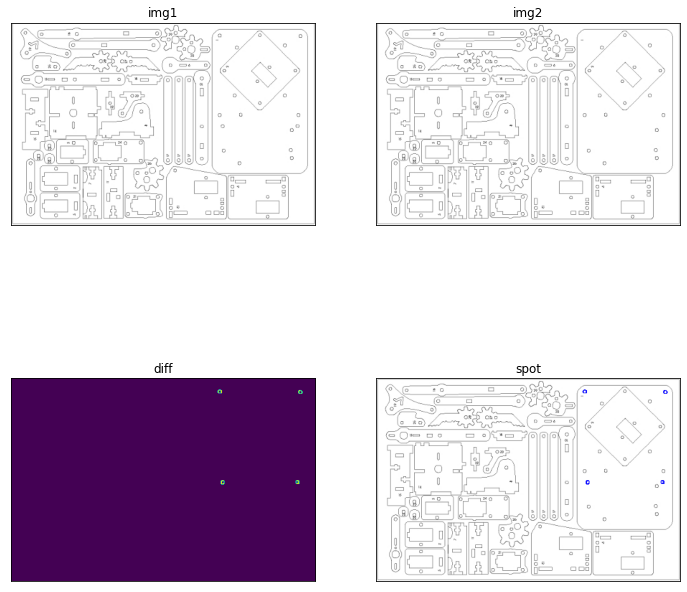

In [21]:
imgs = {
    'img1': img1,
    'img2': img2,
    'diff': diff,
    'spot': spot
}
# Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i + 1)
    plt.imshow(v[:, :])
    plt.title(k)
    plt.xticks([])
    plt.yticks([])
plt.show()

#### ÏÉâÏÉÅÏóê Îî∞Îùº ÏòÅÏó≠ Íµ¨Î∂ÑÌïòÍ∏∞

    ÏÉâÏùÑ Í∞ÄÏßÄÍ≥† ÎßàÏä§ÌÅ¨Î•º ÎßåÎì§Ïñ¥Ïïº ÌïòÎäîÎç∞, HSVÎ°ú Î≥ÄÌôòÌïòÎ©¥ ÏõêÌïòÎäî ÏÉâÏÉÅ Î≤îÏúÑÏùò Í≤ÉÎßå Í≥®ÎùºÎÇº Ïàò ÏûàÏäµÎãàÎã§. 
        * dst = cv2.inRange(img, from, to) : Î≤îÏúÑÏóê ÏÜçÌïòÏßÄ ÏïäÏùÄ ÌîΩÏÖÄ ÌåêÎã®
            - img : ÏûÖÎ†• ÏòÅÏÉÅ
            - from : Î≤îÏúÑÏùò ÏãúÏûë Î∞∞Ïó¥
            - to : Î≤îÏúÑÏùò ÎÅù Î∞∞Ïó¥
            - return img Í∞Ä from ~ to Ïóê Ìè¨Ìï®ÎêòÎ©¥ 255, ÏïÑÎãàÎ©¥ 0ÏùÑ ÌîΩÏÖÄ Í∞íÏúºÎ°ú ÌïòÎäî Î∞∞Ïó¥


In [15]:
import cv2
import numpy as np
import matplotlib.pylab as plt
# Ïã†Ìò∏Îì± ÏòÅÏÉÅ ÏùΩÏñ¥ÏÑú HSVÎ°ú Î≥ÄÌôò
img = cv2.imread("OPENCV/Traffic_light.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  #BGRÏùÑ HSVÎ°ú Ï†ÑÌôò

# ÏÉâÏÉÅÎ≥Ñ ÏòÅÏó≠ ÏßÄÏ†ï np.array([H,S,V])
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255, 255])
green1 = np.array([45, 50, 50])
green2 = np.array([75, 255, 255])
red1 = np.array([0, 50, 50])
red2 = np.array([15, 255, 255])
red3 = np.array([165, 50, 50])
red4 = np.array([180, 255, 255])
yellow1 = np.array([20, 50, 50])
yellow2 = np.array([35, 255, 255])

# ÏÉâÏÉÅÏóê Îî∞Î•∏ ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

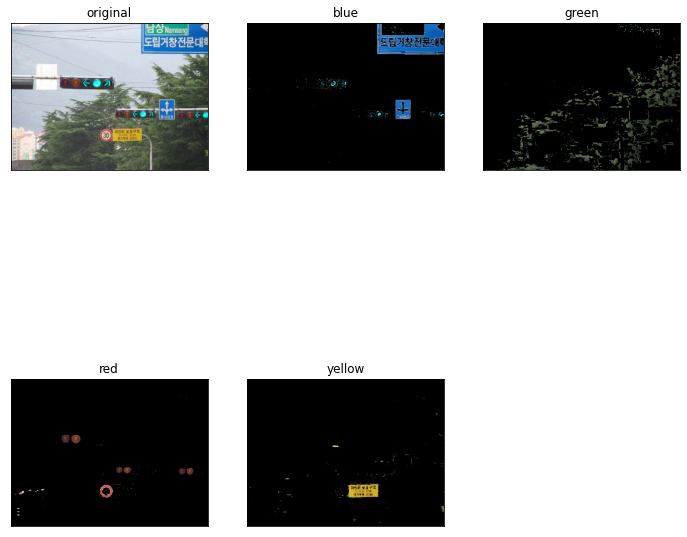

In [16]:
#ÏÉâÏÉÅÎ≥Ñ ÎßàÏä§ÌÅ¨Î°ú ÏÉâÏÉÅÎßå Ï∂îÏ∂ú
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

# Í≤∞Í≥º Ï∂úÎ†•
imgs = {
    'original': img,
    'blue': res_blue,
    'green': res_green,
    'red': res_red,
    'yellow': res_yellow
}



for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 3, i + 1)
    plt.title(k)
    plt.imshow(v[:, :, ::-1])
    plt.xticks([])
    plt.yticks([])

plt.show()

#### Î™®ÏÖò CCTV

In [26]:
import cv2
import numpy as np

a, b, c = None, None, None
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)  # ÌîÑÎ†àÏûÑ Ìè≠ 480ÏúºÎ°ú ÏÑ§Ï†ï
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 320)  # ÌîÑÎ†àÏûÑÏùò ÎÜíÏù¥Î•º 320ÏúºÎ°ú ÏÑ§Ï†ï

if cap.isOpened():
    ret, a = cap.read()  # a ÌîÑÎ†àÏûÑ ÏùΩÍ∏∞
    ret, b = cap.read()  # b ÌîÑÎ†àÏûÑ ÏùΩÍ∏∞
    while ret:
        ret, c = cap.read()  # c ÌîÑÎ†àÏûÑ ÏùΩÍ∏∞
        draw = c.copy()  # Ï∂úÎ†• ÏòÅÏÉÅÏóê ÏÇ¨Ïö©Ìï† Î≥µÏ†úÎ≥∏
        if not ret:  # cÌîÑÎ†àÏûÑÏù¥ ÏóÜÏúºÎ©¥ Ï†ïÏßÄ
            break
        # 3Í∞úÏùò ÏòÅÏÉÅÏùÑ Í∑∏Î†àÏù¥ Ïä§ÏºÄÏùºÎ°ú Î≥ÄÍ≤Ω
        a_gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        b_gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
        c_gray = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)

        # a-b, b-c Ï†àÎåÄÍ∞í Ï∞® Íµ¨ÌïòÍ∏∞
        diff1 = cv2.absdiff(a_gray, b_gray)
        diff2 = cv2.absdiff(b_gray, c_gray)

        # Ïä§Î†àÏãúÌôÄÎìúÎ°ú Í∏∞Ï§ÄÏπò Ïù¥ÎÇ¥Ïùò Ï∞®Ïù¥Îäî Î¨¥Ïãú
        thresh = 25
        ret, diff1_t = cv2.threshold(diff1, thresh, 255, cv2.THRESH_BINARY)
        ret, diff2_t = cv2.threshold(diff2, thresh, 255, cv2.THRESH_BINARY)

        # ÎëêÏ∞®Ïù¥Ïóê ÎåÄÌï¥ÏÑú AND Ïó∞ÏÇ∞, Îëê ÏòÅÏÉÅÏùò Ï∞®Ïù¥Í∞Ä Î™®Îëê Î∞úÍ≤¨Îêú Í≤ΩÏö∞
        diff = cv2.bitwise_and(diff1_t, diff2_t)

        # Ïó¥Î¶º Ïó∞ÏÇ∞ÏúºÎ°ú ÎÖ∏Ïù¥Ï¶à Ï†úÍ±∞
        # ÎØ∏ÏÑ∏Ìïú ÎÖ∏Ïù¥Ï¶à ÎïåÎ¨∏Ïóê ÏõÄÏßÅÏûÑ ÏòÅÏó≠ÏùÑ Ï†ïÌôïÌûà Ï∂îÏ∂úÌï† Ïàò ÏóÜÏñ¥ÏÑú Ï∂îÍ∞ÄÌïú ÏΩîÎìú
        k = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
        diff = cv2.morphologyEx(diff, cv2.MORPH_OPEN, k)

        # Ï∞®Ïù¥Í∞Ä Î∞úÏÉùÌïú ÌîΩÏÖÄÏùò Í∞ØÏàò ÌåêÎã®ÌõÑ ÏÇ¨Í∞ÅÌòï Í∑∏Î¶¨Í∏∞
        diff_cnt = cv2.countNonZero(diff)
        max_diff = 5  # Îã¨ÎùºÏßÑ ÌîΩÏÖÄÏùò Í∞úÏàò Í∏∞Ï§ÄÏπò ÏÑ§Ï†ï

        if diff_cntt > max_diff:
            nzero = np.nonxero(diff)
            cv2.rectangle(draw, (min(nzero[1]), min(nzero[0])),
                          (max(nzero[1]), max(nzero[0])), (0, 255, 0), 2)
            cv2.putText(draw, 'Motion Dtected', (10, 30),
                        cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 0, 255))

        # Ïª¨Îü¨ Ïä§ÏºÄÏùº ÏòÅÏÉÅÍ≥º Ïä§Î†àÏãúÌôÄÎìú ÏòÅÏÉÅÏùÑ ÌÜµÌï©Ìï¥ÏÑú Ï∂úÎ†•
        stacked = np.hstack((draw, cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)))
        cv2.imshow('motion sensor', stacked)

        # Îã§Ïùå ÎπÑÍµêÎ•º ÏúÑÌï¥ ÏòÅÏÉÅ ÏàúÏÑú Ï†ïÎ¶¨
        a = b
        b = c
        if cv2.waitKey(1) & OxFF == 27:
            break

True